In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#load your dataset
df=pd.read_csv('iris.csv')

In [6]:
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.9,3.0,4.2,1.5,Iris-versicolor
1,6.9,3.1,4.9,1.5,Iris-versicolor
2,6.6,2.9,4.6,1.3,Iris-versicolor
3,4.6,3.2,1.4,0.2,Iris-setosa
4,6.0,2.2,4.0,1.0,Iris-versicolor


In [7]:
df.tail()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
145,5.4,3.4,1.7,0.2,Iris-setosa
146,5.5,2.6,4.4,1.2,Iris-versicolor
147,6.7,3.0,5.2,2.3,Iris-virginica
148,7.7,3.8,6.7,2.2,Iris-virginica
149,5.1,3.4,1.5,0.2,Iris-setosa


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3    Petal Width  150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
D=df.iloc[:,:4]
print(D)
# or
#D=df.iloc[:,-1].values

     Sepal Length  Sepal Width  Petal Length   Petal Width
0             5.9          3.0           4.2           1.5
1             6.9          3.1           4.9           1.5
2             6.6          2.9           4.6           1.3
3             4.6          3.2           1.4           0.2
4             6.0          2.2           4.0           1.0
..            ...          ...           ...           ...
145           5.4          3.4           1.7           0.2
146           5.5          2.6           4.4           1.2
147           6.7          3.0           5.2           2.3
148           7.7          3.8           6.7           2.2
149           5.1          3.4           1.5           0.2

[150 rows x 4 columns]


# 1- PairPlot

/Users/cashhollister/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/cashhollister/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/cashhollister/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/cashhollister/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

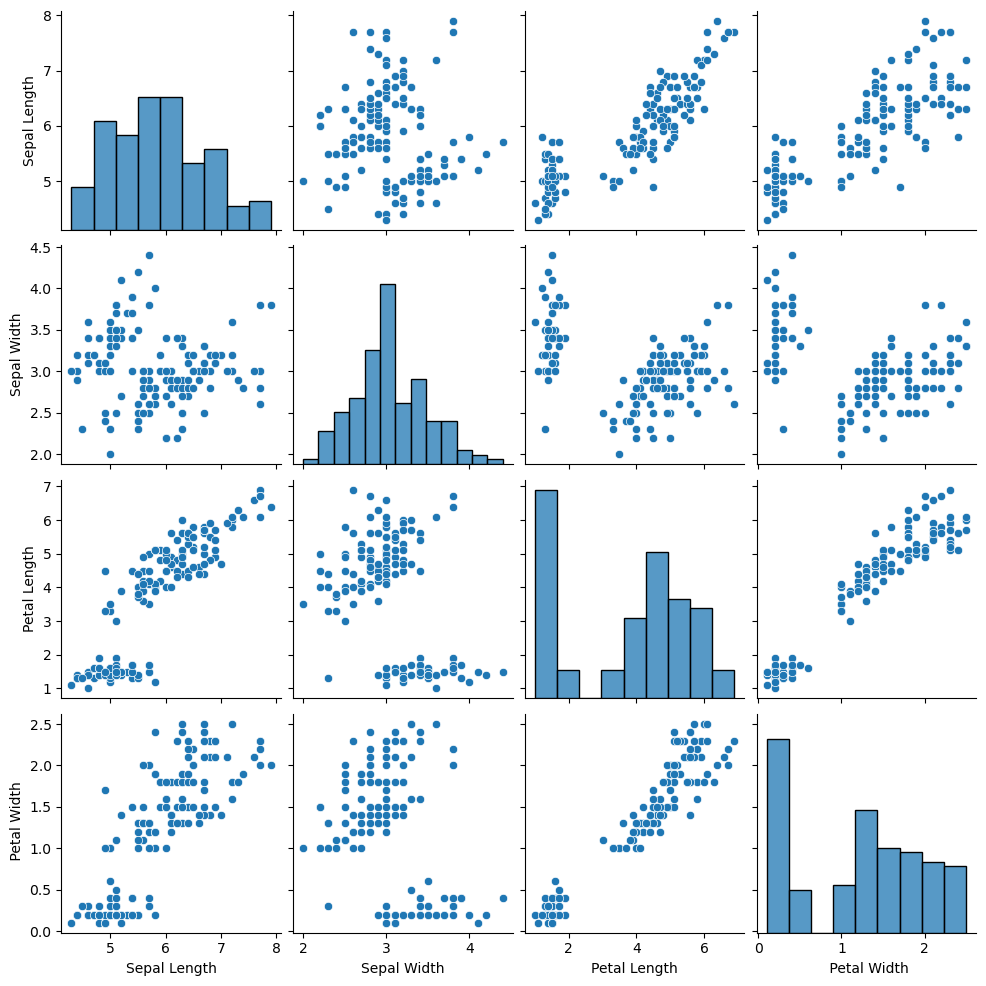

In [10]:
sns.pairplot(D)

The mean vecor is:
$$ \mu=\frac{1}{n}\sum_{i=1}^{n} \vec{x}_{i}$$

To center your data
$$ \bar{D}=D-\vec{1}.\mu^T$$

In [11]:
mean_vector=np.mean(D,axis=0)
D_centered=D-mean_vector
# plot scatter 
plt.scatter(D_centered[:,0],D_centered[:,1])
plt.grid()

InvalidIndexError: (slice(None, None, None), 0)

# Cov_matrix using inner product:
$$\Sigma=\frac{1}{n} \bar{D}^T \bar{D} $$

In [ ]:
n=D.shape[0]
cov_inner=np.dot(D_centered.T,D_centered)/n #
print(cov_inner)
#or 
#cov_inner=(D_centered.T@D_centered.T)/n

[[ 0.68112222 -0.03900667  1.26519111  0.51345778]
 [-0.03900667  0.18675067 -0.319568   -0.11719467]
 [ 1.26519111 -0.319568    3.09242489  1.28774489]
 [ 0.51345778 -0.11719467  1.28774489  0.57853156]]


[[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]


# outer product:
$$\Sigma=\frac{1}{n} \sum_{i=1}^{n} \bar{\vec{x}_{i}} \bar{\vec{x}_{i}}^T$$

In [ ]:
cov_outer=np.zeros((D_centered.shape[1],D_centered.shape[1]))
for i in range(D_centered.shape[0]):
    cov_outer+=np.outer(D_centered[i],D_centered[i])

cov_outer=cov_outer/D_centered.shape[0]
print(cov_outer)

[[ 0.68112222 -0.03900667  1.26519111  0.51345778]
 [-0.03900667  0.18675067 -0.319568   -0.11719467]
 [ 1.26519111 -0.319568    3.09242489  1.28774489]
 [ 0.51345778 -0.11719467  1.28774489  0.57853156]]


In [ ]:
cov_outer=np.zeros((D_centered.shape[1],D_centered.shape[1]))
for i in D_centered:
    cov_outer+=np.outer(i,i)

cov_outer=cov_outer/D_centered.shape[0]
print(cov_outer)

[[ 0.68112222 -0.03900667  1.26519111  0.51345778]
 [-0.03900667  0.18675067 -0.319568   -0.11719467]
 [ 1.26519111 -0.319568    3.09242489  1.28774489]
 [ 0.51345778 -0.11719467  1.28774489  0.57853156]]


# Linear Kernel:
$$K(\vec{x_i},\vec{x_j})=\vec{x_i}^T \vec{x_j}$$

# Poly Kernel:
$$K(\vec{x_i},\vec{x_j})=(c+\vec{x_i}^T \vec{x_j})^{degree}$$ 

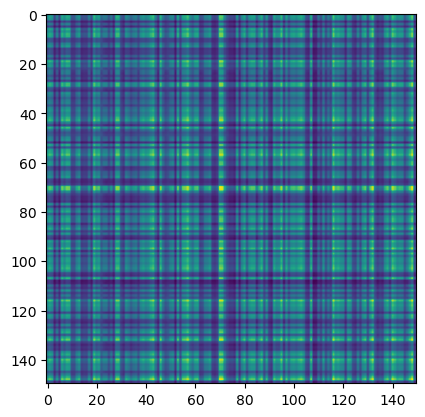

In [ ]:
from sklearn.metrics.pairwise import linear_kernel,polynomial_kernel,rbf_kernel,euclidean_distances
K1=linear_kernel(D)
plt.imshow(K1,cmap='viridis')


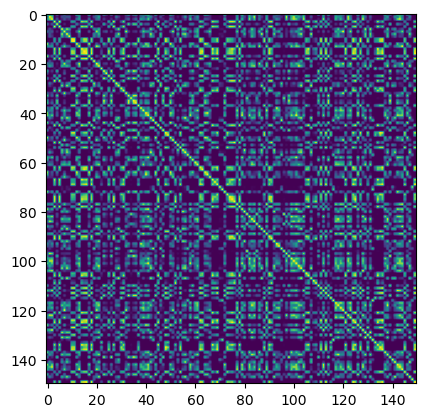

In [ ]:
K2=rbf_kernel(D,gamma=1)
plt.imshow(K2,cmap='viridis')

In [ ]:
w1=0.2
w2=0.8
K5=0.5*linear_kernel(D)+0.5*rbf_kernel(D,gamma=0.1)

# Eigen Values and Eigen Vectors 
$$ \Sigma \vec{v}=\lambda \vec{v}$$

In [ ]:
eigvalues,eigvectors=np.linalg.eigh(cov_inner)
idx=np.argsort(eigvalues)[::-1]
eigvalues=eigvalues[idx]
eigvectors=eigvectors[:,idx]

v1=eigvectors[:,0]# first Eigen Vector
print(eigvalues)


[4.19667516 0.24062861 0.07800042 0.02352514]


In [ ]:
print(D.shape)

(150, 4)


(150, 4)


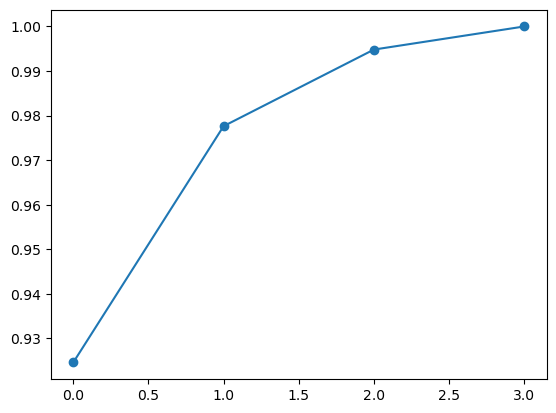

In [ ]:
from sklearn.decomposition import PCA,KernelPCA #(n_components=None

pca=PCA()
D_pca=pca.fit_transform(D)
print(D_pca.shape)

exp_var=pca.explained_variance_ratio_
t=np.cumsum(exp_var)
plt.plot(t,marker='o')
#plt.ylim((0,2))

